In [1]:
import numpy as np
import sys
sys.path.insert(0, "../")

from flatland.envs.rail_generators import sparse_rail_generator
from flatland.envs.line_generators import sparse_line_generator
from flatland.envs.malfunction_generators import ParamMalfunctionGen
from flatland.envs.rail_env import RailEnv
from flatland.envs.observations import GlobalObsForRailEnv

random_env = RailEnv(
    width=np.random.randint(20,101),
    height=np.random.randint(20,101),
    number_of_agents=np.random.randint(1,101),
    rail_generator=sparse_rail_generator(max_num_cities=10),
    line_generator=sparse_line_generator(),
    malfunction_generator=ParamMalfunctionGen((0,0,0)),
    obs_builder_object=GlobalObsForRailEnv()
)

..\flatland\envs\rail_generators.py:351: UserWarning: Could not set all required cities! Created 6/10
  warnings.warn(city_warning)


In [2]:
import PIL
from flatland.utils.rendertools import RenderTool
from IPython.display import clear_output
from flatland.envs.controllers import ShortestPathController


def render_env(env, renderer, wait=True):
    
    env_renderer = renderer
    env_renderer.render_env()

    image = env_renderer.get_image()
    pil_image = PIL.Image.fromarray(image)
    clear_output(wait=True)
    display(pil_image)
    
def run_episode(env):
    renderer = RenderTool(env, gl="PILSVG")
    observations, info = random_env.reset()
    controller = ShortestPathController(env)
    
    score = 0
    actions = dict()

    for step in range(1000):

        actions = controller.act(observations, env)
        next_observations, all_rewards, dones, info = env.step(actions)
        observations = next_observations
        for agent_handle in env.get_agent_handles():
            score += all_rewards[agent_handle]
            
        render_env(env, renderer)
        print('Timestep {}, total score = {}'.format(step, score))

        if dones['__all__']:
            print('All done! It took {} timesteps and the final score was {}.'.format(step, score))
            return

    print("Episode didn't finish after 1000 timesteps. The final score was {}.".format(score))

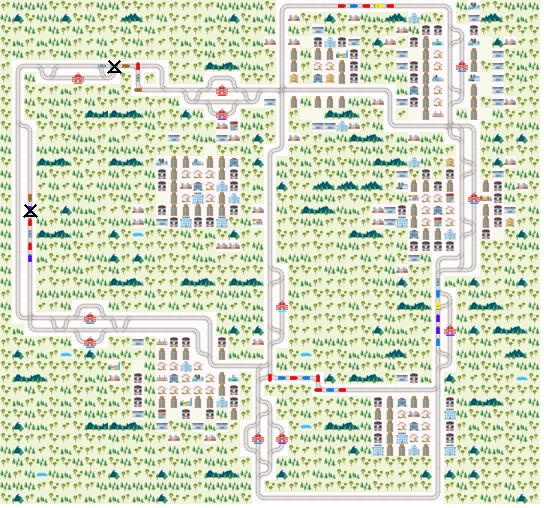

Timestep 699, total score = -35153.0
All done! It took 699 timesteps and the final score was -35153.0.


In [3]:
run_episode(random_env)